In [9]:
%load_ext autoreload
%autoreload 2
# %cd CL_for_timeseries
%cd mnt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import pickle
from gluonts.evaluation import make_evaluation_predictions

from run_nonorm_w_tuning import Objective as nonorm_obj
from run_norm_w_tuning import Objective as norm_obj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[Errno 2] No such file or directory: 'mnt'
/mnt


deepar False gpu


100%|██████████| 100/100 [00:24<00:00,  4.15it/s, epoch=1/2, avg_epoch_loss=1.64]
4it [00:00,  5.91it/s, epoch=1/2, validation_avg_epoch_loss=1.55]
100%|██████████| 100/100 [00:25<00:00,  3.90it/s, epoch=2/2, avg_epoch_loss=0.652]
4it [00:00,  6.53it/s, epoch=2/2, validation_avg_epoch_loss=0.389]


Warming up train dataset...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 144 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Done   7 out of 107 | elapsed:   42.1s remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  18 out of 107 | elapsed:  1.1min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  29 out of 107 | elapsed:  1.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  40 out of 107 | elapsed:  1.4min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  51 out of 107 | elapsed:  1.8min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  62 out of 107 | elapsed:  2.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  73 out of 107 | elapsed:  2.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  84 out of 107 | elapsed:  2.3min remaining:   37.5s
[Parallel(n_jobs=-1)]: Done  95 out of 107 | elapsed:  2.4min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend wi

Warming up test dataset...


[Parallel(n_jobs=-1)]: Done   7 out of 107 | elapsed:   22.3s remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  18 out of 107 | elapsed:   26.5s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  29 out of 107 | elapsed:   34.2s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  40 out of 107 | elapsed:   36.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  51 out of 107 | elapsed:   37.8s remaining:   41.5s
[Parallel(n_jobs=-1)]: Done  62 out of 107 | elapsed:   40.8s remaining:   29.6s
[Parallel(n_jobs=-1)]: Done  73 out of 107 | elapsed:   43.4s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  84 out of 107 | elapsed:   46.0s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  95 out of 107 | elapsed:   50.5s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:  1.2min finished


Done.
Normalizing train dataset...
Saving normalizer parameters...
Saving normalized train dataset, means and vars...
Done.
Normalizing test dataset...
Done.
Saving normalized test dataset, means and vars...
Initializing the mean linear layer...
Initializing the estimator...
Training the estimator...


100%|██████████| 100/100 [02:46<00:00,  1.66s/it, epoch=5/5, avg_epoch_loss=7.91]


Done.
Evaluating the estimator...
Done.


Running evaluation: 107it [00:11,  9.30it/s]


  item_id forecast_start       MSE  abs_error  abs_target_sum  \
0    None        2018-09  0.116333   4.058943       80.884491   
1    None        2018-09  0.096284   3.648380       71.532166   
2    None        2018-09  0.025112   1.852823       80.403000   
3    None        2018-09  1.993288  15.323341      330.173096   
4    None        2018-09  0.004648   0.659550       55.659401   

   abs_target_mean  seasonal_error      MASE      MAPE     sMAPE  \
0         6.740374        0.102143  3.311472  0.050116  0.051428   
1         5.961014        0.098303  3.092815  0.050948  0.052305   
2         6.700250        0.099101  1.558031  0.023003  0.023284   
3        27.514425        0.508069  2.513331  0.046146  0.047429   
4         4.638283        0.112407  0.488959  0.011825  0.011933   

   num_masked_target_values        ND        MSIS  QuantileLoss[0.1]  \
0                       0.0  0.050182  105.451493           0.894874   
1                       0.0  0.051003  100.506837       

100%|██████████| 100/100 [02:48<00:00,  1.68s/it, epoch=1/2, avg_epoch_loss=8.16]
4it [00:05,  1.34s/it, epoch=1/2, validation_avg_epoch_loss=9.46]
100%|██████████| 100/100 [02:54<00:00,  1.74s/it, epoch=2/2, avg_epoch_loss=7.9]
4it [00:06,  1.66s/it, epoch=2/2, validation_avg_epoch_loss=9.37]


MINE
4.226154097413048


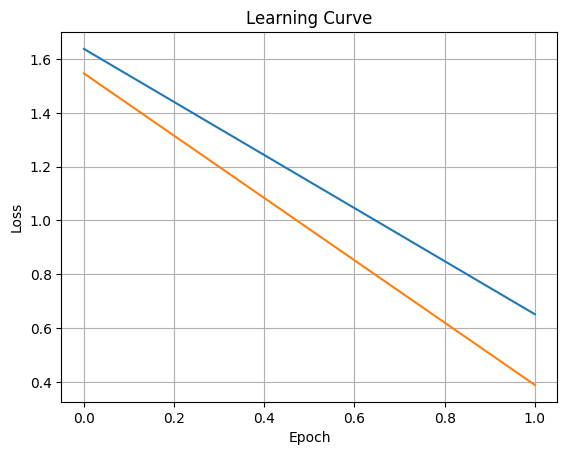

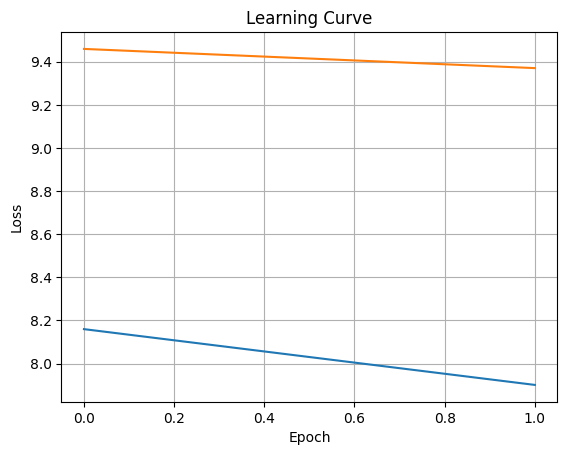

<Figure size 640x480 with 0 Axes>

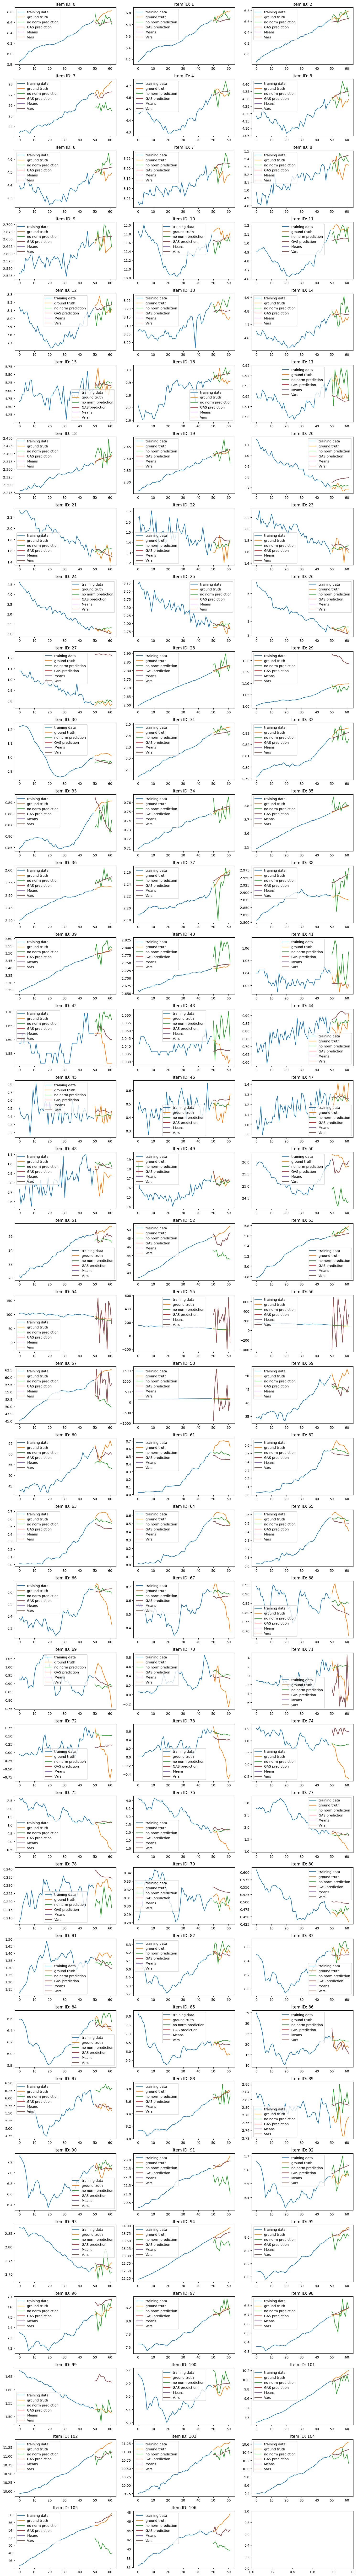

In [10]:
DL_MODEL = 'deepar'
DATASET_NAME = 'fred_md'
mean_str = 0.001
var_str = 0.001
nonorm_params_path = f'saved_nonorm_{DL_MODEL}_{DATASET_NAME}/params.json'
norm_params_path = f'saved_GAS_{DL_MODEL}_{DATASET_NAME}_mean_str_{mean_str}_var_str_{var_str}/params.json'

NORMALIZER_NAME = "gas_t_student"
MEAN_MODEL = "gas"
DL_MODEL_LIBRARY = "gluonts"
DATASET_TYPE = "gluonts"    # gluonts or synthetic
multivariate = ""
ROOT_FOLDER = f"RESULTS_{DATASET_NAME}_{DL_MODEL}_{NORMALIZER_NAME}_{MEAN_MODEL}_{DL_MODEL_LIBRARY}_{mean_str}_{var_str}" + multivariate


####### Load Means and Vars #######
normalizer_folder = os.path.join(ROOT_FOLDER, "normalizer")
init_params_norm_filename = os.path.join(normalizer_folder, 'init_params.json')
###
means_folder = os.path.join(normalizer_folder, 'means')
train_means_folder = os.path.join(means_folder, 'train')
test_means_folder = os.path.join(means_folder, 'test')
vars_folder = os.path.join(normalizer_folder, 'vars')
train_vars_folder = os.path.join(vars_folder, 'train')
test_vars_folder = os.path.join(vars_folder, 'test')
norm_ts_folder = os.path.join(normalizer_folder, 'normalized_ts')
train_norm_ts_folder = os.path.join(norm_ts_folder, 'train')
test_norm_ts_folder = os.path.join(norm_ts_folder, 'test')
params_folder = os.path.join(normalizer_folder, 'normalizer_params')
train_params_folder = os.path.join(params_folder, 'train')
test_params_folder = os.path.join(params_folder, 'test')

train_means = []
for i in range(len(os.listdir(train_means_folder))):
    with open(os.path.join(train_means_folder, f'ts_{i}.pkl'), 'rb') as f:
        train_means.append(pickle.load(f))
test_means = []
for i in range(len(os.listdir(test_means_folder))):
    with open(os.path.join(test_means_folder, f'ts_{i}.pkl'), 'rb') as f:
        test_means.append(pickle.load(f))
train_vars = []
for i in range(len(os.listdir(train_vars_folder))):
    with open(os.path.join(train_vars_folder, f'ts_{i}.pkl'), 'rb') as f:
        train_vars.append(pickle.load(f))
test_vars = []
for i in range(len(os.listdir(test_vars_folder))):
    with open(os.path.join(test_vars_folder, f'ts_{i}.pkl'), 'rb') as f:
        test_vars.append(pickle.load(f))
train_params = []
for i in range(len(os.listdir(train_params_folder))):
    with open(os.path.join(train_params_folder, f'ts_{i}.pkl'), 'rb') as f:
        train_params.append(pickle.load(f))
test_params = []
for i in range(len(os.listdir(test_params_folder))):
    with open(os.path.join(test_params_folder, f'ts_{i}.pkl'), 'rb') as f:
        test_params.append(pickle.load(f))
test_norm_ts = []
for i in range(len(os.listdir(test_norm_ts_folder))):
    with open(os.path.join(test_norm_ts_folder, f'ts_{i}.pkl'), 'rb') as f:
        test_norm_ts.append(pickle.load(f))
##################################


####### Train Models with Loaded Params #######
with open(nonorm_params_path, 'r') as f:
    nonorm_params = json.load(f)
with open(norm_params_path, 'r') as f:
    norm_params = json.load(f)
nonorm_params['trainer:epochs'] = 2
norm_params['trainer:epochs'] = 2

nonorm_obj_instance = nonorm_obj(
    DL_MODEL, DATASET_NAME, 'gpu', None, multivariate=False
)
nonorm_res, nonorm_predictor, nonorm_dir_name, nonorm_history = nonorm_obj_instance.train_and_test(nonorm_params, save=True)

norm_obj_instance = norm_obj(
    DL_MODEL, DATASET_NAME, 'gpu', None, multivariate=False
)
norm_res, norm_predictor, norm_dir_name, norm_history = norm_obj_instance.train_and_test(norm_params, save=True)

forecast_it, ts_it = make_evaluation_predictions(
    dataset=nonorm_obj_instance.test,  # validation dataset
    predictor=nonorm_predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
nonorm_forecasts = []
for f in forecasts:
    nonorm_forecasts.append(f.median)

forecast_it, ts_it = make_evaluation_predictions(
    dataset=norm_obj_instance.test,  # validation dataset
    predictor=norm_predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
norm_forecasts = []
for f in forecasts:
    norm_forecasts.append(f.median)

##############################################
    

####### Plotting #######
    
import math
import matplotlib.pyplot as plt

dir_name = f'comparisons/comparison_{DL_MODEL}_{DATASET_NAME}_mean_str_{mean_str}_var_str_{var_str}'
os.makedirs(dir_name, exist_ok=True)

plt.clf()
plt.plot(nonorm_history.loss_history, label='Training Loss')
plt.plot(nonorm_history.validation_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(True)
# plt.savefig(f'{dir_name}/learning_curve_no_norm.png')
plt.show()
plt.clf()

plt.plot(norm_history.loss_history, label='Training Loss')
plt.plot(norm_history.validation_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(True)
# plt.savefig(f'{dir_name}/learning_curve_GAS.png')
plt.show()
plt.clf()

# Determine the layout of the subplots
num_plots = len(nonorm_obj_instance.test)
num_cols = 3  # adjust as needed
num_rows = math.ceil(num_plots / num_cols)

# Create a figure for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
training_length_to_plot = 10 # training_data.shape[0]

for item_id, ts in enumerate(nonorm_obj_instance.test):
    # Determine the current subplot
    ax = axs[item_id // num_cols, item_id % num_cols]

    training_data = ts["target"].T[:-nonorm_obj_instance.prediction_length]
    ground_truth = ts["target"].T[-nonorm_obj_instance.prediction_length:]
    nonorm_pred = nonorm_forecasts[item_id]
    norm_pred = norm_forecasts[item_id]
    
    means = test_means[item_id]
    vars = test_vars[item_id]
    # norm_ts = test_norm_ts[item_id]

    # Plot the data on the current subplot
    ax.plot(np.arange(training_length_to_plot), training_data[-training_length_to_plot:], label="training data")
    ax.plot(np.arange(training_length_to_plot, training_length_to_plot + ground_truth.shape[0]), ground_truth, label="ground truth")
    ax.plot(np.arange(training_length_to_plot, training_length_to_plot + nonorm_pred.shape[0]), nonorm_pred, label="no norm prediction")
    ax.plot(np.arange(training_length_to_plot, training_length_to_plot + norm_pred.shape[0]), norm_pred, label="GAS prediction")
    
    ax.plot(np.arange(training_length_to_plot, training_length_to_plot + means.shape[0]), means, label="Means")
    ax.plot(np.arange(training_length_to_plot, training_length_to_plot + vars.shape[0]), vars, label="Vars")
    ax.set_title(f"Item ID: {item_id}")
    ax.legend()

# Show the figure with all subplots
plt.tight_layout()
plt.show()
# plt.savefig(f'{dir_name}/pred_plots.png')


In [11]:
num_cols

3